<h1><center> Assignment 1 - Exploratory Data Analysis(EDA) </center></h1>

#### Date: 09/26/2019
#### Author: Kamrun
#### Course: DSE 6000
#### Dataset: Crimes - 2001 to present - Dashboard 
#### Dataset link: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Dashboard/5cd6-ry5g
#### Colab link: https://storage.googleapis.com/skyhope/Crime_Chicago.csv

# Crime in Chicago
Crime in Chicago is one of the most popular topics for all data scientists due to the availability of huge amounts of publicly available high quality data set which will help all data scientists to explore.

In this notebook, I am going to explore more about crime in Chicago and try to answer the following questions:
Question_1: How many types of crimes are found in chicago over the given period? 
Question-2: Which location in chicago experienced highest number of crime incidents?
Question_3: what is the trend of the crimes from 2001 to 2019?
Question-4: Are some types of crimes more likely to happen in specific month of the year?
Question-5: Are some types of crimes more likely to happen in specific day of the week?
Question-6: Are some types of crimes more likely to happen in specific time of the day?
Question-7: Demonstrate arrest rate based on crime categories



# Importing data and loading packages 
First, I am going to import libraries required and read the data into python.


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

I uploaded the *.csv file on google cloud. Then, I created google cloud url link which I used to load the data 
here.

In [ ]:
crime_chicago = pd.read_csv('https://storage.googleapis.com/skyhope/Crime_Chicago.csv')

# Overview of the dataset
In this section, i will check how many columns and rows in our dataset are and what their types are and also explore summary statistics of our dataset. 


In [2]:
print(crime_chicago.shape)
crime_chicago.info()


(6963286, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6963286 entries, 0 to 6963285
Data columns (total 30 columns):
ID                            int64
Case Number                   object
Date                          object
Block                         object
IUCR                          object
Primary Type                  object
Description                   object
Location Description          object
Arrest                        bool
Domestic                      bool
Beat                          int64
District                      float64
Ward                          float64
Community Area                float64
FBI Code                      object
X Coordinate                  float64
Y Coordinate                  float64
Year                          int64
Updated On                    object
Latitude                      float64
Longitude                     float64
Location                      object
Historical Wards 2003-2015    float64
Zip Codes            


In crime_chicago dataset, there are 30 columns and 6963286 number of rows. This dataset consists of character, integer, 
boolian, and floating variables. 

In the next part of the code, i will explore summary statistics which include mean, standard deviation, minimum and maximum value of each column.


In [3]:
crime_chicago.describe()


,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
count,6.963286e+06,6.963286e+06,6.963239e+06,6.348460e+06,6.349791e+06,6.897157e+06,6.897157e+06,6.963286e+06,6.897157e+06,6.897157e+06,6.877133e+06,6.897157e+06,6.879883e+06,6.882027e+06,6.879995e+06,6.879930e+06,6.880963e+06,6.880986e+06
mean,6.392928e+06,1.190240e+03,1.129831e+01,2.269934e+01,3.756233e+01,1.164532e+06,1.885733e+06,2.008644e+03,4.184205e+01,-8.767175e+01,2.738513e+01,1.910594e+04,3.872514e+01,3.813677e+02,2.554233e+01,3.146718e+01,1.492157e+01,1.504932e+02
std,3.136681e+06,7.032299e+02,6.945768e+00,1.383472e+01,2.153692e+01,1.714748e+04,3.267622e+04,5.254071e+00,8.991558e-02,6.205980e-02,1.526482e+01,5.738033e+03,2.009053e+01,2.300869e+02,1.477210e+01,1.914200e+01,6.452095e+00,7.849008e+01
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01,1.000000e+00,2.733000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,3.496304e+06,6.220000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152941e+06,1.859184e+06,2.004000e+03,4.176890e+01,-8.771383e+01,1.400000e+01,2.118400e+04,2.500000e+01,1.760000e+02,1.200000e+01,1.500000e+01,1.000000e+01,8.300000e+01
50%,6.379614e+06,1.111000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166016e+06,1.890630e+06,2.008000e+03,4.185568e+01,-8.766612e+01,2.700000e+01,2.156000e+04,3.700000e+01,3.780000e+02,2.600000e+01,3.000000e+01,1.600000e+01,1.530000e+02
75%,9.105690e+06,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176352e+06,1.909276e+06,2.013000e+03,4.190679e+01,-8.762833e+01,4.100000e+01,2.224300e+04,5.800000e+01,5.770000e+02,3.700000e+01,5.000000e+01,2.000000e+01,2.210000e+02
max,1.182673e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.019000e+03,4.202291e+01,-8.752453e+01,5.300000e+01,2.691200e+04,7.700000e+01,8.010000e+02,5.000000e+01,6.100000e+01,2.500000e+01,2.770000e+02


In [4]:
crime_chicago.head(5)
crime_chicago.tail(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
6963281,3536061,HK577780,01/01/2001 12:00:00 AM,072XX S WENTWORTH AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,-87.629872,"(41.763414952, -87.629871775)",17.0,21559.0,67.0,494.0,32.0,11.0,17.0,210.0
6963282,3890045,HL265830,01/01/2001 12:00:00 AM,113XX S HARVARD AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,-87.631536,"(41.68831595, -87.631536251)",45.0,21861.0,45.0,660.0,22.0,19.0,10.0,267.0
6963283,3496126,HK563568,01/01/2001 12:00:00 AM,012XX W 49TH PL,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,RESIDENCE,True,False,...,-87.657315,"(41.804258318, -87.65731478)",19.0,14924.0,59.0,739.0,4.0,37.0,23.0,118.0
6963284,3661792,HK760148,01/01/2001 12:00:00 AM,054XX S DREXEL AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,-87.604013,"(41.796676399, -87.604012947)",32.0,21192.0,8.0,440.0,33.0,10.0,24.0,124.0
6963285,3361926,HK408994,01/01/2001 12:00:00 AM,059XX N CLARK ST,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,False,...,-87.670069,"(41.989019862, -87.67006944)",46.0,4451.0,76.0,538.0,24.0,14.0,2.0,55.0


# Cleaning the data 

Now I will clean the data by fixing the column names, filling in null or empty values, time formating, and so on.

## Check if Column name has space in between words
For simplicity, the best practice is to remove spaces between words and substitute with underscore.

In [5]:

crime_chicago.columns = crime_chicago.columns.str.replace(' ', '_')
crime_chicago.head()


,ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,...,Longitude,Location,Historical_Wards_2003-2015,Zip_Codes,Community_Areas,Census_Tracts,Wards,Boundaries_-_ZIP_Codes,Police_Districts,Police_Beats
0,11822700,JC426287,09/06/2019 11:55:00 PM,012XX W ADDISON ST,0810,THEFT,OVER $500,APARTMENT,False,False,...,-87.659472,"(41.94714472, -87.6594722)",38.0,21186.0,57.0,728.0,25.0,53.0,5.0,12.0
1,11819855,JC423179,09/06/2019 11:55:00 PM,005XX E 32ND ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,-87.613033,"(41.836069707, -87.613033345)",1.0,21194.0,1.0,581.0,10.0,40.0,24.0,169.0
2,11819844,JC423159,09/06/2019 11:53:00 PM,017XX S MICHIGAN AVE,0320,ROBBERY,STRONGARM - NO WEAPON,TAVERN/LIQUOR STORE,False,False,...,-87.623951,"(41.858643312, -87.6239505)",48.0,21194.0,34.0,374.0,9.0,40.0,22.0,148.0
3,11819848,JC423127,09/06/2019 11:52:00 PM,005XX N DRAKE AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,-87.714951,"(41.890645892, -87.714951125)",41.0,21572.0,24.0,584.0,46.0,30.0,16.0,65.0
4,11819900,JC423169,09/06/2019 11:50:00 PM,055XX S WOOD ST,0560,ASSAULT,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,...,-87.669414,"(41.792959315, -87.669413975)",44.0,22257.0,65.0,345.0,3.0,23.0,17.0,270.0


## Dropping extra columns I do not need
In order to answer the questions listed above, some of columns are unnecessary. Therefore, I drop those extra columns. 

In [6]:


crime_chicago.drop(columns=['Case_Number','IUCR','Description','Ward','FBI_Code','Updated_On','Latitude','Longitude','Location','Historical_Wards_2003-2015','Zip_Codes',
                            'Community_Areas','Census_Tracts','Wards','Boundaries_-_ZIP_Codes','Police_Beats','Beat'],axis=1,inplace=True)



In [7]:
crime_chicago.head()

,ID,Date,Block,Primary_Type,Location_Description,Arrest,Domestic,District,Community_Area,X_Coordinate,Y_Coordinate,Year,Police_Districts
0,11822700,09/06/2019 11:55:00 PM,012XX W ADDISON ST,THEFT,APARTMENT,False,False,19.0,6.0,1167566.0,1924050.0,2019,5.0
1,11819855,09/06/2019 11:55:00 PM,005XX E 32ND ST,BATTERY,APARTMENT,False,True,2.0,35.0,1180539.0,1883677.0,2019,24.0
2,11819844,09/06/2019 11:53:00 PM,017XX S MICHIGAN AVE,ROBBERY,TAVERN/LIQUOR STORE,False,False,1.0,33.0,1177496.0,1891878.0,2019,22.0
3,11819848,09/06/2019 11:52:00 PM,005XX N DRAKE AVE,CRIMINAL DAMAGE,STREET,False,False,11.0,23.0,1152622.0,1903348.0,2019,16.0
4,11819900,09/06/2019 11:50:00 PM,055XX S WOOD ST,ASSAULT,RESIDENCE PORCH/HALLWAY,False,False,7.0,67.0,1165296.0,1867844.0,2019,17.0


## Converting column names to lower case
mix of upper and lower case in any specific columns is not convenient. When I do querry of any column, if the name is not typed correctly, the code will throw an error. Therefore, it is more convenient to convert all upper case to lower case.


In [8]:
crime_chicago.columns = crime_chicago.columns.str.lower()  
crime_chicago.head()

,id,date,block,primary_type,location_description,arrest,domestic,district,community_area,x_coordinate,y_coordinate,year,police_districts
0,11822700,09/06/2019 11:55:00 PM,012XX W ADDISON ST,THEFT,APARTMENT,False,False,19.0,6.0,1167566.0,1924050.0,2019,5.0
1,11819855,09/06/2019 11:55:00 PM,005XX E 32ND ST,BATTERY,APARTMENT,False,True,2.0,35.0,1180539.0,1883677.0,2019,24.0
2,11819844,09/06/2019 11:53:00 PM,017XX S MICHIGAN AVE,ROBBERY,TAVERN/LIQUOR STORE,False,False,1.0,33.0,1177496.0,1891878.0,2019,22.0
3,11819848,09/06/2019 11:52:00 PM,005XX N DRAKE AVE,CRIMINAL DAMAGE,STREET,False,False,11.0,23.0,1152622.0,1903348.0,2019,16.0
4,11819900,09/06/2019 11:50:00 PM,055XX S WOOD ST,ASSAULT,RESIDENCE PORCH/HALLWAY,False,False,7.0,67.0,1165296.0,1867844.0,2019,17.0


## Deduping
Deduping means duplication. Duplicate data may give erroneous results depending on the circumstances we are analyzing. Therefore, they must be checked and removed. 

In [9]:
crime_chicago.duplicated().sum()


0

It can be clearly seen that there is no duplicate values in our dataset

## Checking missing values
It is very common to have missing values in a large dataset which come from missing entry. Missing vale usually is denoted by NAN, i.e. not a number. Missing values can be taken care several ways. Since my dataset is large, I will drop all the missing values in this case. 

In [10]:
crime_chicago.isnull().values.any()
crime_chicago.isnull().sum()


id                           0
date                         0
block                        0
primary_type                 0
location_description      5501
arrest                       0
domestic                     0
district                    47
community_area          613495
x_coordinate             66129
y_coordinate             66129
year                         0
police_districts         82323
dtype: int64

In [11]:
crime_chicago.isnull().sum().sum()

833624

## Dropping all the missing values.

In [12]:
crime_chicago.dropna(inplace = True)
crime_chicago.shape


(6273435, 13)

## Converting dates to pandas datetime format
In this part, I will convert dates to pandas datetime format and set the date time index which will help me a lot later on.



In [13]:
crime_chicago.date = pd.to_datetime(crime_chicago.date, format='%m/%d/%Y %I:%M:%S %p')
# setting the date time index which will be beneficial in the future
crime_chicago.index = pd.DatetimeIndex(crime_chicago.date)

Finally, I am done with all data cleaning process. Now, it's time to analyze data.

# Data analysis

## Types of crime
#### Question 1: How many types of crimes are found in chicago over the given period?



In [14]:
crime_chicago.groupby('primary_type').size().sort_values(ascending=False)
crime_count = pd.DataFrame(crime_chicago.groupby('primary_type').size().sort_values(ascending=False).rename('Count').reset_index())
crime_count

,primary_type,Count
0,THEFT,1326387
1,BATTERY,1148636
2,CRIMINAL DAMAGE,717491
3,NARCOTICS,646056
4,ASSAULT,393409
5,OTHER OFFENSE,389390
6,BURGLARY,361501
7,MOTOR VEHICLE THEFT,285939
8,DECEPTIVE PRACTICE,246400
9,ROBBERY,237337


As shown in the above list, there are 35 types of crimes reported to chicago police. Of them, theft was the most 
reported crime whereas domestic violence is the least reported crime. In fact, there was only one domestic crime
reported from 2001 to 2019. I was surprised to see battery theft ranked two in terms of no of reported crime. Since
Non-criminal type was found three times in the above list, I grouped them into one category.


In [15]:
crime_chicago['primary_type'] = crime_chicago['primary_type'].replace(['NON - CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)'
                                                                      ], 
                                                          'NON-CRIMINAL')
crime_chicago.primary_type.unique()

array(['THEFT', 'BATTERY', 'ROBBERY', 'CRIMINAL DAMAGE', 'ASSAULT',
       'NARCOTICS', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'MOTOR VEHICLE THEFT', 'WEAPONS VIOLATION', 'BURGLARY',
       'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'INTERFERENCE WITH PUBLIC OFFICER', 'LIQUOR LAW VIOLATION',
       'PUBLIC PEACE VIOLATION', 'STALKING', 'KIDNAPPING', 'SEX OFFENSE',
       'GAMBLING', 'ARSON', 'CONCEALED CARRY LICENSE VIOLATION',
       'CRIM SEXUAL ASSAULT', 'INTIMIDATION', 'HOMICIDE', 'PROSTITUTION',
       'OBSCENITY', 'HUMAN TRAFFICKING', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'RITUALISM'],
      dtype=object)

I want to see the top 10 most frequently reported crimes in a bar chart.

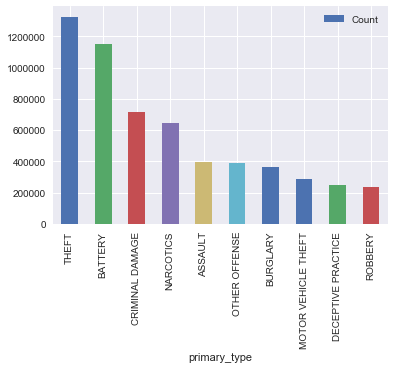

In [16]:
crime_count[:10].plot(x='primary_type',y='Count',kind='bar')

For 19 years, there were more than 1.4 million theft crime, more than 1.2 million battery crime, and so on.
In this top 10 lists, robbery was the least reported crime and it was reported more than 200k times. 

## Crime location
#### Question 2: Which location in chicago experienced highest number of crime incidents?


In [17]:
crime_location = pd.DataFrame(crime_chicago.groupby('location_description').size().sort_values(ascending=False).rename('Count').reset_index())
crime_location.shape



(179, 2)

There are 179 unique location descriptions, hence only the top 10 would be visualized.


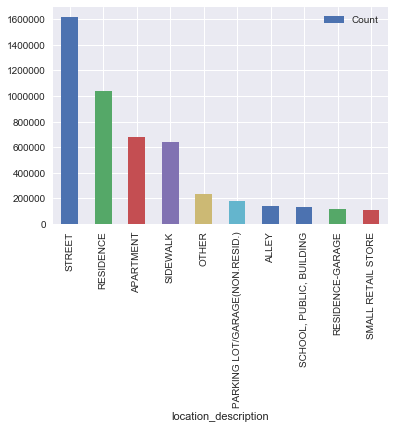

In [18]:
crime_location[:10].plot(x='location_description',y='Count',kind='bar')


Most crime incidents happen on the streets whereas residence is the second highest crime reported area.
Small retail store is the least reported crime incidence. Based on this graph, when I visit Chicago next time,
I will be more vigilent while walking on the street. 

#### Question_3: what is the trend of the crimes from 2001 to 2019?

In [19]:
crime_year = crime_chicago.resample('Y').count()
crime_year = pd.DataFrame(crime_year.iloc[:,0])
crime_year.columns = ['Total_crime_per_year']
print(crime_year.head())
print(crime_year.tail())

            Total_crime_per_year
date                            
2001-12-31                  5739
2002-12-31                344629
2003-12-31                470774
2004-12-31                465983
2005-12-31                448709
            Total_crime_per_year
date                            
2015-12-31                257119
2016-12-31                265769
2017-12-31                263439
2018-12-31                262060
2019-12-31                175025


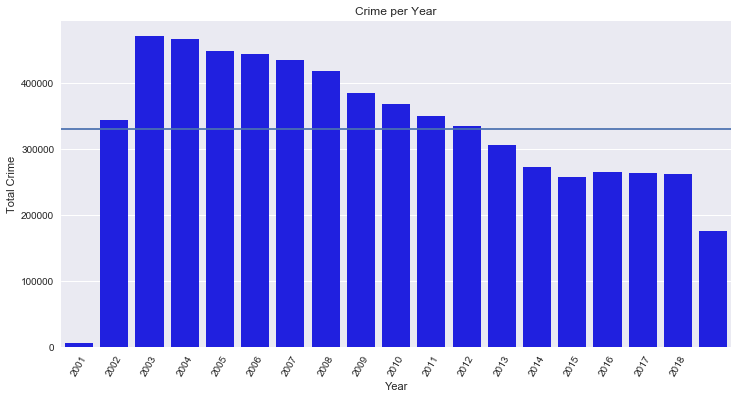

In [20]:
crime_year = crime_year['2001' : '2019']

a = crime_year.index
b = np.arange(2001,2019)

grid = sns.barplot(x = a ,y = 'Total_crime_per_year', data = crime_year, color = 'blue')

grid.set_xticklabels(b, rotation = 60)
plt.ylabel('Total Crime')
plt.xlabel('Year')
plt.title('Crime per Year')
plt.axhline(crime_year['Total_crime_per_year'].mean())
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

As shown in the above graph, the no of crime was the least on 2001. However, the crime rate increased
significantly in 2002.I need to do further investigation why the crime rate increased so much in just one year. 
There are few possibilities, probably there were some change of economy, immigration of people from other cities, 
people did not report, and so on. The crime rate further increase in 2003 from 2002. However, crime rate monotonocally 
reduced until 2015. The crime rate from 2016 to 2018 were remained unchanged. In 2019, the crime rate shows very
low because the year is still running. 


In [21]:
#### Question-4:Are some types of crimes more likely to happen in specific month of the year?


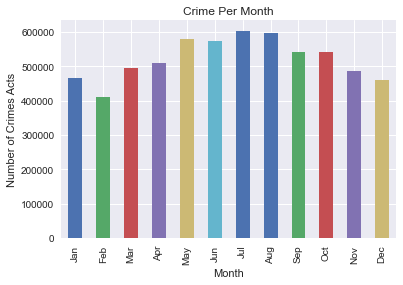

In [22]:
month = ['Jan','Feb','Mar',  'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
crime_chicago.groupby([crime_chicago.index.month]).size().plot.bar()
plt.xticks(np.arange(12), month)
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()


As shown in the above graph, more crime activities are found to be on summer, i.e. from May to August. 
On the other hand, less no of crimes happen during cold weather, e.g. Jan, Feb, Macrch, April, Sept, Oct,
Nov, and Dec. It is noteable that least amount of crimes are reported on February. Typically, the weather is 
very cold on February and people tend to have less activity during coldest weather. Thus, less no of crimes are
reported. 

### Question-5: Are some types of crimes more likely to happen in specific day of the week?

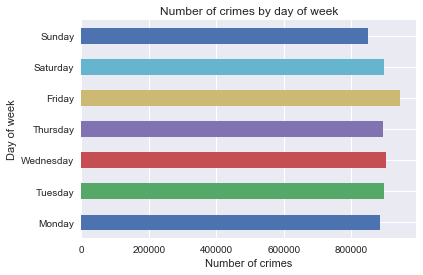

In [25]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
crime_chicago.groupby([crime_chicago.index.dayofweek]).size().plot(kind='barh')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.ylabel('Day of week')
plt.title('Number of crimes by day of week')
plt.show()


As seen in the above bar chart, the crime activities are more or less evenly distributed throughout the week.
However, max no of crimes occur on Friday. Since Friday is the end of the week and people tend to go out for 
party on Friday, it is expected to have more crimes reported on Friday.

## Question-6: Are some types of crimes more likely to happen in specific time of the day?

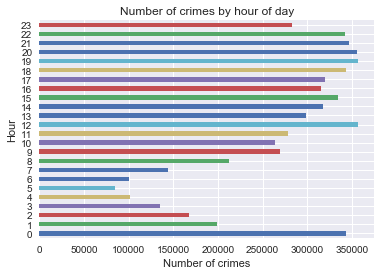

In [24]:
crime_chicago.groupby([crime_chicago.index.hour]).size().plot(kind='barh')
plt.xlabel('Number of crimes')
plt.ylabel('Hour')
plt.title('Number of crimes by hour of day')
plt.show()

The above bar chart shows the no of crimes at different times of the day. There is a strong correlation between 
sleeping time and the crime activities. As you can see, least no of crime activities were found at 5 A.M. because 
people usually sleep at that time and small stores are usually closed. The highest no of crimes were reported during
lunch (12 PM), and dinner (7 & 8 PM). 

## Question-7: Demonstrate arrest rate based on crime categories

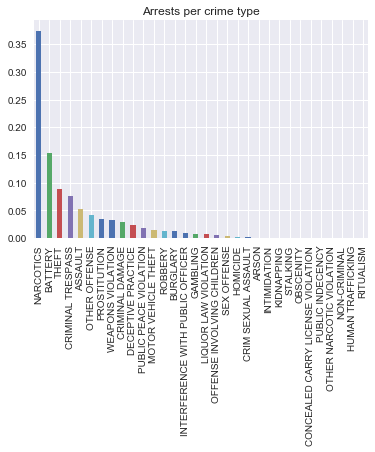

In [27]:
crime_chicago[crime_chicago.arrest == True]['primary_type'].value_counts(normalize=True).plot.bar()
plt.title("Arrests per crime type")
plt.show()

The above bar chart shows the arrest rate for different categories. Since more arrested happened due to narcotics,
we can infer that drug is strongly related to crimes. Least no of arrest occured due to Arson, kidnapping, stalking,
obscenity, human trafficking, and others.

#Conclusion

In this article, I have investigated the Chicago crime on different days, time, month, and year. I have also
reported what kind of criminal activities lead to arrests, where those criminal activities most likely to happen
, and finally what criminal activities typically occur. This helps us to gain insights about the criminal activities.
Police can be more vigilent about the uprise criminal activities at those specific hour/day/month and thus reduce 
criminal activies. Here is the summary of my data analysis.

1. Theft related criminal activities were most reported.
2. According to crime location, prominent crime activities happened on the street.
3. Total reported crimes for the last three years are much less and steady compared to 2003. As of today in 2019, crime
reports are low. Of course, we do not have the data for the rest of the year.
4. More crimes were reported on summer.
5. Crimes on Friday night are the highest.
6. Typically, lunch and dinner time have the most crime reported. 
7. Drug (Narcotics) related arrests were the most reported crime in Chicago.


In the future, I would like to visualize the crime records on the map which will help me identifying the bad 
neighbourhood. I would also like to explore more and find more insights from the data.
